In [1]:
from nltk.corpus import wordnet as wn
import networkx as nx
from nltk.corpus import wordnet_ic
from pywsd.lesk import simple_lesk as lesk

Warming up PyWSD (takes ~10 secs)... took 16.05903959274292 secs.


In [2]:
def closure_graph(fn, *argv):
    seen = set()
    graph = nx.Graph()

    for arg in argv :
        def recurse(s):
            if not s in seen:
                seen.add(s)
                graph.add_node(s.name())
                for s1 in fn(s):
                    graph.add_node(s1.name())
                    graph.add_edge(s.name(), s1.name())
                    recurse(s1)

        recurse(arg)
    return graph

In [3]:
brown_ic = wordnet_ic.ic('ic-brown.dat')
nickel = wn.synset('nickel.n.02')
dime = wn.synset('dime.n.01')
budget = wn.synset('budget.n.01')
richter = wn.synset('richter_scale.n.01')
coin = wn.synset('coin.n.01')

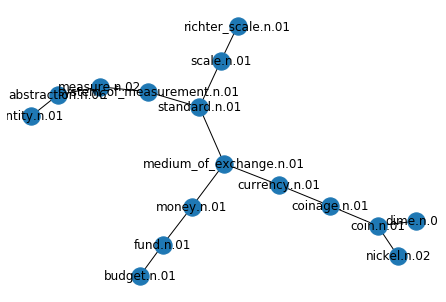

In [12]:
graph = closure_graph(lambda s: s.hypernyms(), nickel, dime, budget, richter)
nx.draw(graph, with_labels=True)

In [5]:
print("Path based similarity between nickel and coin:",nickel.path_similarity(coin))

Path based similarity between nickel and coin: 0.5


In [6]:
print("Leacock-Chodorow similarity between nickel and coin:",nickel.lch_similarity(coin))

Leacock-Chodorow similarity between nickel and coin: 2.9444389791664407


In [7]:
print("Resnik similarity between nickel and coin:", nickel.res_similarity(wn.synset('coin.n.01'), brown_ic))

Resnik similarity between nickel and coin: 7.455288045755159


In [8]:
print("Lin similarity between nickel and coin:", nickel.lin_similarity(coin, brown_ic))

Lin similarity between nickel and coin: 0.760033943480688


In [9]:
print("Jiang-Conrath between nickel and coin:", nickel.jcn_similarity(coin, brown_ic))

Jiang-Conrath between nickel and coin: 0.21241674547815945


In [10]:
banks = wn.synsets('bank')
for ss in banks :
    print(ss, ss.definition())

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

In [11]:
sentences = ['I went to the bank to deposit my money',  
'The river bank was full of dead fishes']  
print ("Context-1:", sentences[0])  
answer = lesk(sentences[0],'bank')  
print ("Sense:", answer)  
print ("Definition : ", answer.definition())  
print ("Context-1:", sentences[1])  
answer = lesk(sentences[1],'bank')  
print ("Sense:", answer)  
print ("Definition : ", answer.definition())  

Context-1: I went to the bank to deposit my money
Sense: Synset('depository_financial_institution.n.01')
Definition :  a financial institution that accepts deposits and channels the money into lending activities
Context-1: The river bank was full of dead fishes
Sense: Synset('bank.n.01')
Definition :  sloping land (especially the slope beside a body of water)
